# 随机梯度下降

## 导数和梯度

### 导数

* 含义：导数表示一个函数在某一点上的**变化率**或斜率。导数的本质是通过极限的概念对函数进行局部的线性逼近。
* 数学表示：$f’(x) = \lim_{{h \to 0}} \frac{{f(x + h) - f(x)}}{{h}}$

* 代码示例：

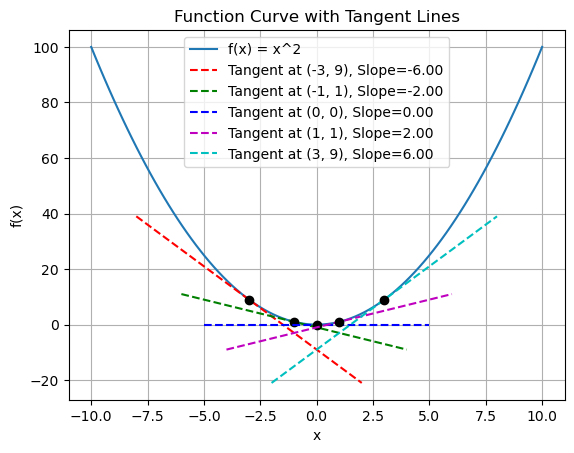

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x):
    return x ** 2

# 定义导数函数
def df(x):
    return 2 * x

# 绘制函数曲线和切线
x = np.linspace(-10, 10, 100)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, label='f(x) = x^2')

# 绘制多个点处的切线
points = [(-3, 9), (-1, 1), (0, 0), (1, 1), (3, 9)]
colors = ['r', 'g', 'b', 'm', 'c']

for point, color in zip(points, colors):
    tangent_x = np.linspace(point[0] - 5, point[0] + 5, 100)
    tangent_y = df(point[0]) * (tangent_x - point[0]) + point[1]
    ax.plot(tangent_x, tangent_y, color=color, linestyle='--')
    
    # 绘制切点
    ax.plot(point[0], point[1], 'ko')
    
    # 计算斜率并标注在图例中
    slope = df(point[0])
    legend_label = f'Tangent at ({point[0]}, {point[1]}), Slope={slope:.2f}'
    ax.plot(np.nan, np.nan, color=color, linestyle='--', label=legend_label)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.title('Function Curve with Tangent Lines')
plt.legend()
plt.grid(True)
plt.show()

### 偏导数

* 含义：偏导数是多元函数中关于其中一个自变量的导数。
* 数学表示：$\frac{{\partial f}}{{\partial x_i}}$

假设我们有一个二元函数$f(x, y) = x^2 + y^2$。

偏导数就是 $\frac{{\partial f}}{{\partial x}} = 2x，\frac{{\partial f}}{{\partial y}} = 2y$。

### 方向导数

* 含义：方向导数是函数在某一点沿着特定方向的变化率。
* 数学表示：$\nabla f \cdot \vec{v}$，其中$\nabla f$表示梯度，$\vec{v}$表示方向向量。
* 代码示例

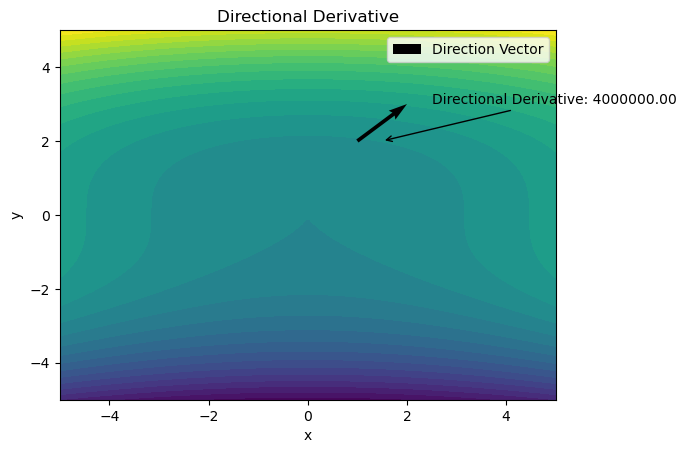

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x, y):
    return x**2 + y**3

# 计算梯度和方向导数
def gradient(f, point):
    h = 1e-6
    grad = []
    for i in range(len(point)):
        args_plus = point.copy()
        args_plus[i] += h
        args_minus = point.copy()
        args_minus[i] -= h
        grad.append((f(*args_plus) - f(*args_minus)) / (2 * h))
    return np.array(grad)

def directional_derivative(f, point, direction_vector):
    grad = gradient(f, point)
    return np.dot(grad, direction_vector)

# 绘制等高线和方向导数
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z, levels=30, cmap="viridis")

# 计算方向导数和绘制箭头
point = np.array([1, 2])
direction_vector = np.array([1, 1])

dd = directional_derivative(f, point, direction_vector)

ax.quiver(point[0], point[1], direction_vector[0], direction_vector[1], angles='xy', scale_units='xy', scale=1, label='Direction Vector')
ax.annotate('Directional Derivative: {:.2f}'.format(dd), xy=(point[0]+0.5, point[1]), xytext=(point[0]+1.5, point[1]+1),
arrowprops=dict(facecolor='black', arrowstyle='->'),
)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Directional Derivative')
plt.legend()
# plt.colorbar()
plt.show()

### 梯度

梯度是多元函数在某一点上的变化率最快的方向。通过梯度，我们可以确定函数在给定点处沿着哪个方向变化最快。

对于一个多元函数$f(x_1, x_2, \ldots, x_n)$，其梯度表示为：

$\nabla f = \left( \frac{{\partial f}}{{\partial x_1}}, \frac{{\partial f}}{{\partial x_2}}, \ldots, \frac{{\partial f}}{{\partial x_n}} \right)$

其中，$\nabla$表示梯度，$\frac{{\partial f}}{{\partial x_i}}$表示函数$f$关于变量$x_i$的偏导数。

## 梯度下降

梯度下降算法是机器学习中使用非常广泛的优化算法，也是众多机器学习算法中最常用的优化方法。

梯度下降算法是通过沿着目标函数 $J(θ)$ 参数 $θ∈R$ 的梯度（一阶导数）相反方向 $−∇θJ(θ)$ 来不断更新模型参数来到达目标函数的极小值点（收敛），更新步长为 $η$。

在梯度下降算法的基础上，有三种常见的梯度下降算法框架：批量梯度下降（Batch Gradient Descent，BGD）、随机梯度下降（Stochastic Gradient Descent，SGD）和小批量梯度下降（Mini-batch Gradient Descent）。

* 批量梯度下降（BGD）：

    * 参数更新公式：$\theta \leftarrow \theta - \eta \cdot \nabla J(\theta)$
    * 梯度计算公式：$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \nabla j(\theta; x^{(i)}, y^{(i)})$

* 小批量梯度下降（Mini-batch Gradient Descent, BGD）：

    * 参数更新公式：$ \theta \leftarrow \theta - \eta \cdot \nabla J(\theta) $
    * 梯度计算公式：$ \nabla J(\theta) = \frac{1}{b} \sum_{i=1}^{b} \nabla j(\theta; x^{(i)}, y^{(i)}) $，$b$ 表示小批量样本的数量（b < n）。

* 随机梯度下降（SGD）：

    * 参数更新公式：$\theta \leftarrow \theta - \eta \cdot \nabla j(\theta; x^{(i)}, y^{(i)})$
    * 梯度计算公式：$ \nabla j(\theta; x^{(i)}, y^{(i)}) $ 每次只计算一个或一对样本 $i$ 的梯度。

![](../../images/gradient-descent/gradient_descent.png)

下面演示下SGD的使用：

In [17]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 生成一个回归数据集
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SGDRegressor对象，并指定参数
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42)

# 使用随机梯度下降进行拟合
sgd_regressor.fit(X_train, y_train)

# 预测测试集样本
y_pred = sgd_regressor.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04317817383434817


## 梯度下降的优化
这些梯度下降算法有一些缺点：

* 可能收敛到局部最小值：梯度下降算法可能会在非凸问题中收敛到局部最小值而不是全局最小值。
* 学习率的选择：学习率的选择很重要，如果学习率太大，可能会导致参数在搜索空间中跳动；如果学习率太小，可能会导致收敛速度过慢。

因此有很多改进方法[1]，下面将进行介绍

### 动量法

如果在峡谷地区(某些方向较另一些方向上陡峭得多，常见于局部极值点)，SGD会在这些地方附近振荡，从而导致收敛速度慢。动量在参数更新项中加上一次更新量(即动量项)，即： $νt=γνt−1+η ∇θJ(θ)，θ=θ−νt$

其中动量项超参数 $γ<1$ 一般是小于等于0.9。优化的效果如下图所示：

![](../../images/gradient-descent/momentum.png)

加上动量项就像从山顶滚下一个球，求往下滚的时候累积了前面的动量(动量不断增加)，因此速度变得越来越快，直到到达终点。

### NAG

从山顶往下滚的球会盲目地选择斜坡。更好的方式应该是在遇到倾斜向上之前应该减慢速度。

Nesterov accelerated gradient（NAG，涅斯捷罗夫梯度加速）不仅增加了动量项，并且在计算参数的梯度时，在损失函数中减去了动量项，即计算$∇θJ(θ−γνt−1)$，这种方式预估了下一次参数所在的位置。即：

$νt=γνt−1+η⋅∇θJ(θ−γνt−1)，θ=θ−νt$

momentum首先计算一个梯度(短的蓝色向量)，然后在加速更新梯度的方向进行一个大的跳跃(长的蓝色向量)，nesterov项首先在之前加速的梯度方向进行一个大的跳跃(棕色向量)，计算梯度然后进行校正(绿色梯向量)


![](../../images/gradient-descent/nesterov.png)

其实，momentum项和nesterov项都是为了使梯度更新更加灵活，对不同情况有针对性。但是，人工设置一些学习率总还是有些生硬，接下来介绍几种自适应学习率的方法

### 自适应学习率

* Adagrad：其实是对学习率进行了一个约束。适合处理稀疏梯度。
* Adadelta：对Adagrad的扩展，Adagrad会累加之前所有的梯度平方，而Adadelta只累加固定大小的项，并且也不直接存储这些项，仅仅是近似计算对应的平均值。训练初中期，加速效果不错，很快。
* RMSprop：可以算作Adadelta的一个特例。适合处理非平稳目标 - 对于RNN效果很好。
* Adam(Adaptive Moment Estimation)本质上是带有动量项的RMSprop，它利用梯度的一阶矩估计和二阶矩估计动态调整每个参数的学习率。结合了Adagrad善于处理稀疏梯度和RMSprop善于处理非平稳目标的优点。内存小、学习率自适应、适用于高维度大数据。
* Adamax是Adam的一种变体，此方法对学习率的上限提供了一个更简单的范围。
* Nadam类似于带有Nesterov动量项的Adam。Nadam对学习率有了更强的约束，同时对梯度的更新也有更直接的影响。一般而言，在想使用带动量的RMSprop，或者Adam的地方，大多可以使用Nadam取得更好的效果。

具体公式参考[2]，下面给出这些算法的演进过程图：

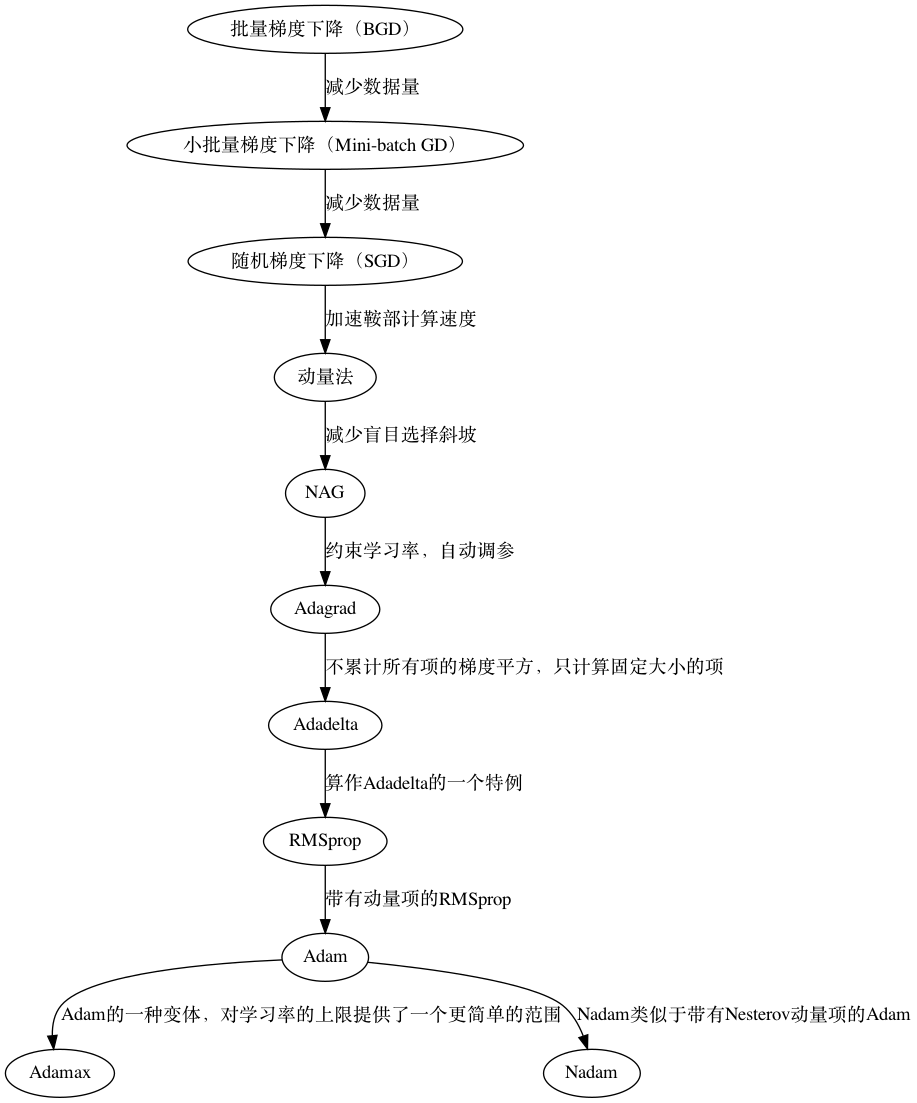

In [20]:
import graphviz
from IPython.display import Image

# 创建Graph对象
graph = graphviz.Digraph()

# 添加节点和边
graph.node("BGD", label="批量梯度下降（BGD）")
graph.node("Mini-batch GD", label="小批量梯度下降（Mini-batch GD）")
graph.node("SGD", label="随机梯度下降（SGD）")
graph.node("Momentum", label="动量法")
graph.node("NAG", label="NAG")
graph.node("Adagrad", label="Adagrad")
graph.node("Adadelta", label="Adadelta")
graph.node("RMSprop", label="RMSprop")
graph.node("Adam", label="Adam")
graph.node("Adamax", label="Adamax")
graph.node("Nadam", label="Nadam")

graph.edge("BGD", "Mini-batch GD", label="减少数据量")
graph.edge("Mini-batch GD", "SGD", label="减少数据量")
graph.edge("SGD", "Momentum", label="加速鞍部计算速度")
graph.edge("Momentum", "NAG", label="减少盲目选择斜坡")
graph.edge("NAG", "Adagrad", label="约束学习率，自动调参")
graph.edge("Adagrad", "Adadelta", label="不累计所有项的梯度平方，只计算固定大小的项")
graph.edge("Adadelta", "RMSprop", label="算作Adadelta的一个特例")
graph.edge("RMSprop", "Adam", label="带有动量项的RMSprop")
graph.edge("Adam", "Adamax", label="Adam的一种变体，对学习率的上限提供了一个更简单的范围")
graph.edge("Adam", "Nadam", label="Nadam类似于带有Nesterov动量项的Adam")

# 使用Graphviz库渲染决策树图形
dot_data = graph.pipe(format='png')
Image(dot_data)

另外引用原文中，各个算法运行效果图。

曲面
![](../../images/gradient-descent/surface.gif)

鞍部
![](../../images/gradient-descent/saddle.gif)


## 参考

本文大量参考[1]，原文写得非常好，可以看看原文。

* [1] 各种梯度下降方法及其可视化 https://www.ruder.io/optimizing-gradient-descent/
* [2] 1的中文版本 https://zhuanlan.zhihu.com/p/480322641